### aim: 

### date: 

In [6]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [7]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [8]:
import numpy as np
#from cmocean import cm
# import cartopy as cp
# import cartopy.crs as ccrs
# import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

# %matplotlib inline
# import warnings
# from datetime import datetime
# warnings.filterwarnings('ignore')
# import cartopy.feature as cfeature
# from importlib import reload
# import matplotlib.path as mpath
# import glob
# import pickle
# import pandas as pd
# import seawater
# import time
import glob

plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

## effect of different looping years 

    CEC1/ CNC1: 1990
    CEC2/'' : 1959
    CEC3/'' : 1980
    CEC4/'' : 1967


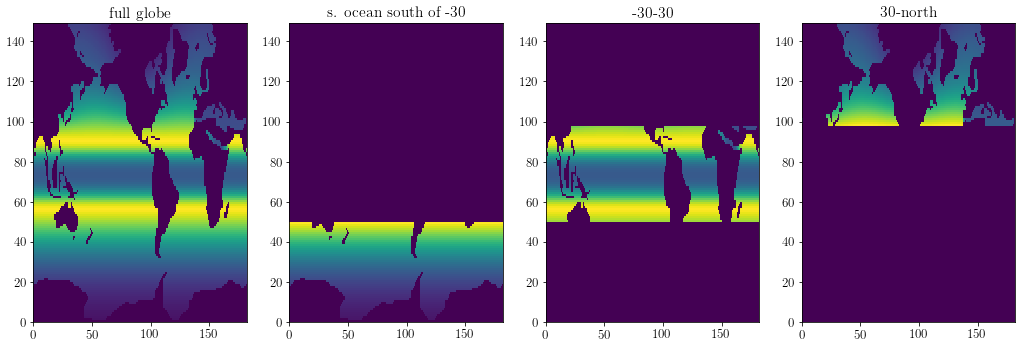

In [47]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]

cs_so = np.copy(tmesh.csize.values)
cs_so[50:200,:] = 0
cs_ml = np.copy(tmesh.csize.values)
cs_ml[0:50,:] = 0
cs_ml[98:150,:] = 0
cs_hl = np.copy(tmesh.csize.values)
cs_hl[0:98,:] = 0

var_copy = tmesh['csize'].copy()
var_copy.name = 'cs_ml'
var_copy.data = cs_ml
tmesh['cs_ml'] =var_copy

var_copy = tmesh['csize'].copy()
var_copy.name = 'cs_hl'
var_copy.data = cs_hl
tmesh['cs_hl'] =var_copy

var_copy = tmesh['csize'].copy()
var_copy.name = 'cs_so'
var_copy.data = cs_so
tmesh['cs_so'] =var_copy

fact = 1.1
fig, axs = plt.subplots(1,4, figsize=(16*fact, 5*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
axs[0].pcolormesh(tmesh.csize)
axs[1].pcolormesh(tmesh.cs_so)
axs[2].pcolormesh(tmesh.cs_ml)
axs[3].pcolormesh(tmesh.cs_hl)

tits = ['full globe','s. ocean south of -30','-30-30','30-north']

for i in range(0,4):
    axs[i].set_title(tits[i])

In [12]:
def make_yearlist(yrst, yrend, dtype, tr, baseDir = '/gpfs/data/greenocean/software/runs/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/TOM12_TJ_{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

In [14]:
ex = False
if ex:
    dtype = 'diad'
    yrst = 1940; yrend = 2019
    CEA1 = xr.open_mfdataset(make_yearlist(yrst, yrend, dtype, 'CEA1'))
    CEC1 = xr.open_mfdataset(make_yearlist(yrst, yrend, dtype, 'CEC1'))
    CEC2 = xr.open_mfdataset(make_yearlist(yrst, yrend, dtype, 'CEC2'))
    CEC3 = xr.open_mfdataset(make_yearlist(yrst, yrend, dtype, 'CEC3'))
    CEC4 = xr.open_mfdataset(make_yearlist(yrst, yrend, dtype, 'CEC4'))

    yrst = 1948
    CNA1 = xr.open_mfdataset(make_yearlist(yrst, yrend, dtype, 'CNA1'))
    CNC1 = xr.open_mfdataset(make_yearlist(yrst, yrend, dtype, 'CNC1'))
    CNC2 = xr.open_mfdataset(make_yearlist(yrst, yrend, dtype, 'CNC2'))
    CNC3 = xr.open_mfdataset(make_yearlist(yrst, yrend, dtype, 'CNC3'))
    CNC4 = xr.open_mfdataset(make_yearlist(yrst, yrend, dtype, 'CNC4'))

    #mol/m2/s

    dsl = [CEA1,CEC1,CEC2,CEC3,CEC4,CNA1,CNC1,CNC2,CNC3,CNC4]
    dsn = ['CEA1', 'CEC1', 'CEC2', 'CEC3', 'CEC4', 'CNA1', 'CNC1', 'CNC2', 'CNC3', 'CNC4']

    for i in range(0,len(dsl)):# in dsl:
        ds = dsl[i]
        nds = dsn[i]
        print('---')
        CEA1_yrly = ds.Cflx.weighted(tmesh['csize']).mean(dim = ['x','y'])
        CEA1_yrly.to_netcdf(f'./GCBdata/{nds}_fglobe_ts.nc')
        CEA1_yrly = ds.Cflx.weighted(tmesh['cs_ml']).mean(dim = ['x','y'])
        CEA1_yrly.to_netcdf(f'./GCBdata/{nds}_cs_ml_ts.nc')
        CEA1_yrly = ds.Cflx.weighted(tmesh['cs_so']).mean(dim = ['x','y'])
        CEA1_yrly.to_netcdf(f'./GCBdata/{nds}_cs_so_ts.nc')
        CEA1_yrly = ds.Cflx.weighted(tmesh['cs_hl']).mean(dim = ['x','y'])
        CEA1_yrly.to_netcdf(f'./GCBdata/{nds}_cs_hl_ts.nc')

In [48]:
print(size_so)
print(size_hl)

110508668030545.4
58770122060013.97


Text(0.5, 0.98, 'ERA5-forced A (var clim var CO2) and C (stat clim var CO2) runs with different looping years, CAL12 model')

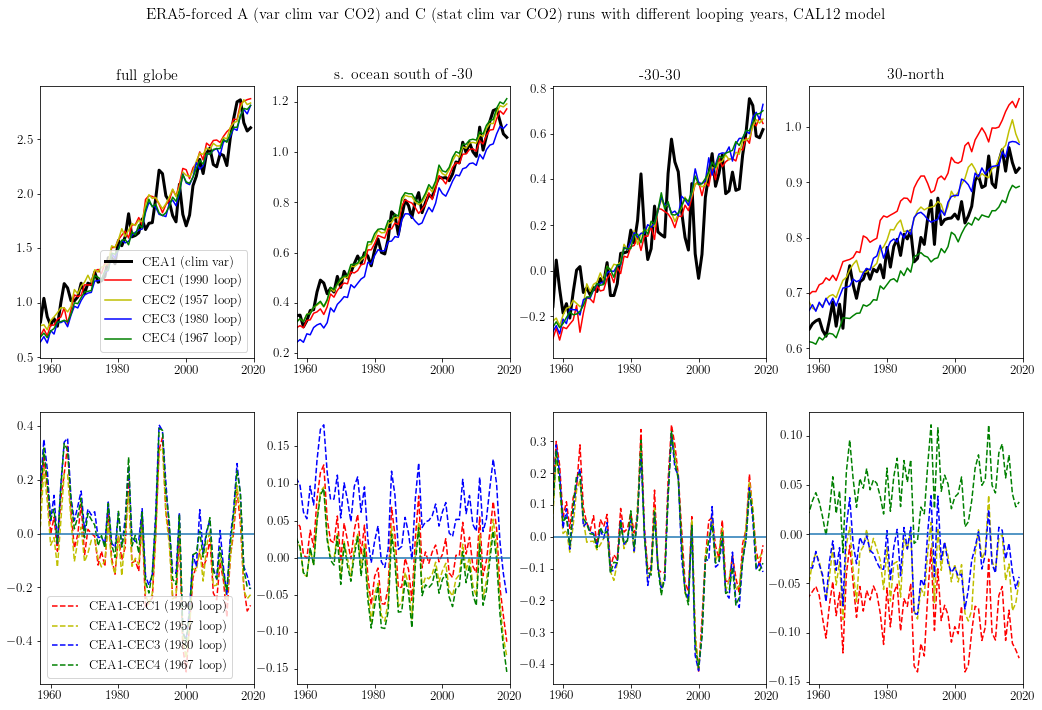

In [42]:
Adir = 'CEA1'
Cdirs = ['CEC1','CEC2','CEC3','CEC4']
stit = 'ERA5-forced A (var clim var CO2) and C (stat clim var CO2) runs with different looping years, CAL12 model'


size_fg = np.nansum(tmesh.csize)
size_so = np.nansum(tmesh.cs_so)
size_ml = np.nansum(tmesh.cs_ml)
size_hl = np.nansum(tmesh.cs_hl)

siy = 60*60*24*365.5
mol_to_Pg = 12 * 1*10**(-15)#e-15


cols = ['r','y','b','g']
Cdirs = ['CEC1','CEC2','CEC3','CEC4']
yrs = [1990,1957,1980,1967]


fact = 1.1
fig, axs = plt.subplots(2,4, figsize=(16*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

ind = 0
mas = ['fglobe','cs_so','cs_ml','cs_hl']
siz = [size_fg,size_so,size_ml,size_hl]
tits = ['full globe','s. ocean south of -30','-30-30','30-north']
for i in range(0,4):
    ma = mas[i]
    t = xr.open_dataset(f'./GCBdata/{Adir}_{ma}_ts.nc')
    tt = t.groupby('time_counter.year').mean()
    axs[ind].plot(tt.year,tt.Cflx * siy * siz[i] * mol_to_Pg, color = 'k', lw =3, label = 'CEA1 (clim var)')
    for w in range(0,4):
        t = xr.open_dataset(f'./GCBdata/{Cdirs[w]}_{ma}_ts.nc')
        tt = t.groupby('time_counter.year').mean()
        axs[ind].plot(tt.year,tt.Cflx * siy * siz[i] * mol_to_Pg, color = cols[w], label = f'{Cdirs[w]} ({yrs[w]} loop)')
        axs[ind].set_xlim([1957,2020])
    axs[0].legend(loc = 'best')
    axs[ind].set_title(tits[i])
    ind = ind+1

ind = 4
for i in range(0,4):
    ma = mas[i]
    t = xr.open_dataset(f'./GCBdata/{Adir}_{ma}_ts.nc')
    tt = t.groupby('time_counter.year').mean()
    ttvar = tt.Cflx * siy * siz[i] * mol_to_Pg
    for w in range(0,4):
        t = xr.open_dataset(f'./GCBdata/{Cdirs[w]}_{ma}_ts.nc')
        tt = t.groupby('time_counter.year').mean()
        axs[ind].plot(tt.year,ttvar - (tt.Cflx * siy * siz[i] * mol_to_Pg), linestyle = '--', color = cols[w], label = f'{Adir}-{Cdirs[w]} ({yrs[w]} loop)')
        axs[ind].set_xlim([1957,2020])
    axs[ind].axhline(y= 0)
    axs[4].legend(loc = 'best')
    ind = ind+1

plt.suptitle(stit)


Text(0.5, 0.98, 'NCEP-forced A (var clim var CO2) and C (stat clim var CO2) runs with different looping years, CAL12 model')

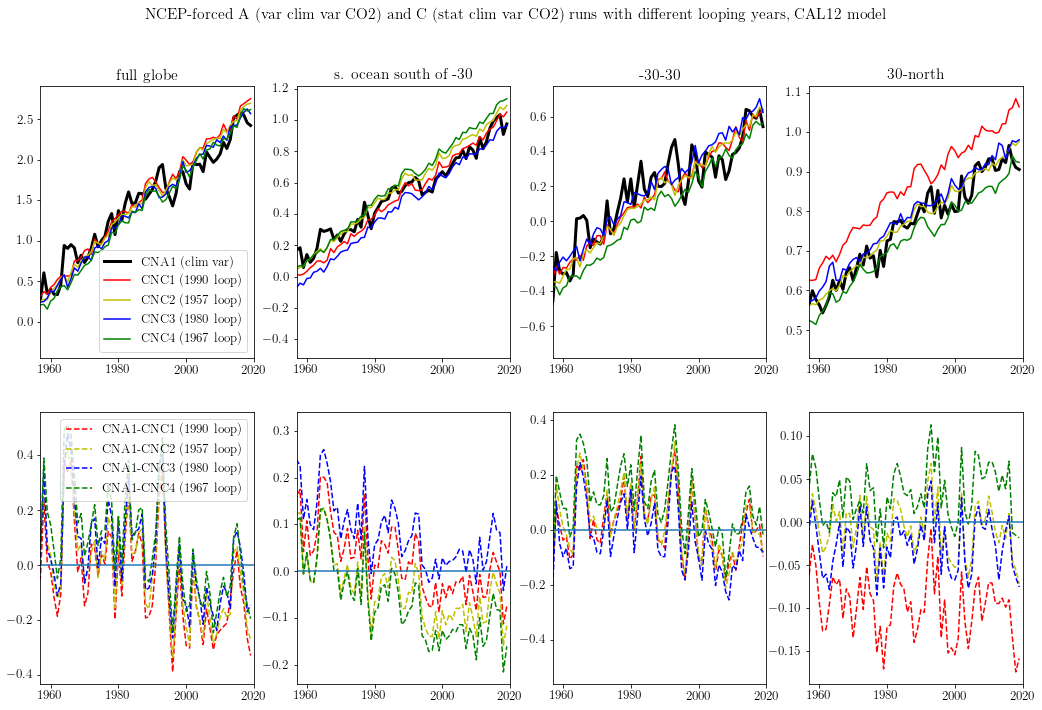

In [46]:
Adir = 'CNA1'
Cdirs = ['CNC1','CNC2','CNC3','CNC4']
stit = 'NCEP-forced A (var clim var CO2) and C (stat clim var CO2) runs with different looping years, CAL12 model'


size_fg = np.nansum(tmesh.csize)
size_so = np.nansum(tmesh.cs_so)
size_ml = np.nansum(tmesh.cs_ml)
size_hl = np.nansum(tmesh.cs_hl)

siy = 60*60*24*365.5
mol_to_Pg = 12 * 1*10**(-15)#e-15


cols = ['r','y','b','g']
yrs = [1990,1957,1980,1967]


fact = 1.1
fig, axs = plt.subplots(2,4, figsize=(16*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

ind = 0
mas = ['fglobe','cs_so','cs_ml','cs_hl']
siz = [size_fg,size_so,size_ml,size_hl]
tits = ['full globe','s. ocean south of -30','-30-30','30-north']
for i in range(0,4):
    ma = mas[i]
    t = xr.open_dataset(f'./GCBdata/{Adir}_{ma}_ts.nc')
    tt = t.groupby('time_counter.year').mean()
    axs[ind].plot(tt.year,tt.Cflx * siy * siz[i] * mol_to_Pg, color = 'k', lw =3, label = 'CNA1 (clim var)')
    for w in range(0,4):
        t = xr.open_dataset(f'./GCBdata/{Cdirs[w]}_{ma}_ts.nc')
        tt = t.groupby('time_counter.year').mean()
        axs[ind].plot(tt.year,tt.Cflx * siy * siz[i] * mol_to_Pg, color = cols[w], label = f'{Cdirs[w]} ({yrs[w]} loop)')
        axs[ind].set_xlim([1957,2020])
    axs[0].legend(loc = 'best')
    axs[ind].set_title(tits[i])
    ind = ind+1

ind = 4
for i in range(0,4):
    ma = mas[i]
    t = xr.open_dataset(f'./GCBdata/{Adir}_{ma}_ts.nc')
    tt = t.groupby('time_counter.year').mean()
    ttvar = tt.Cflx * siy * siz[i] * mol_to_Pg
    for w in range(0,4):
        t = xr.open_dataset(f'./GCBdata/{Cdirs[w]}_{ma}_ts.nc')
        tt = t.groupby('time_counter.year').mean()
        axs[ind].plot(tt.year,ttvar - (tt.Cflx * siy * siz[i] * mol_to_Pg), linestyle = '--', color = cols[w], label = f'{Adir}-{Cdirs[w]} ({yrs[w]} loop)')
        axs[ind].set_xlim([1957,2020])
    axs[ind].axhline(y= 0)
    axs[4].legend(loc = 'best')
    ind = ind+1

plt.suptitle(stit)


## random bordel
